In [55]:
from datasets import load_dataset
import pandas as pd
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import random

# 設置 Stanford NER jar 和模型的完整路徑
jar = r"C:\Users\USER\Downloads\NLP-Courses\NLP243\Projects\stanford-ner-2020-11-17\stanford-ner-4.2.0.jar"
english_model = r"C:\Users\USER\Downloads\NLP-Courses\NLP243\Projects\stanford-ner-2020-11-17\classifiers\english.conll.4class.distsim.crf.ser.gz"
chinese_model = r"C:\Users\USER\Downloads\NLP-Courses\NLP243\Projects\stanford-ner-2020-11-17\classifiers\chinese.misc.distsim.crf.ser.gz"

english_ner_tagger = StanfordNERTagger(english_model, jar, encoding='utf-8')
chinese_ner_tagger = StanfordNERTagger(chinese_model, jar, encoding='utf-8')

# 使用 datasets 套件載入 IWSLT 2017 英中翻譯資料集，設置 trust_remote_code=True
dataset = load_dataset('iwslt2017', 'iwslt2017-en-zh', split='train', trust_remote_code=True)

# 隨機選取 1000 個樣本作為測試資料，剩餘的保留為縮小的訓練資料集
sample_size = 100
test_samples = dataset.shuffle(seed=42).select(range(sample_size))
train_samples = dataset.select(range(sample_size, len(dataset)))

# 提取中英文句子
english_sentences = [example['translation']['en'] for example in test_samples]
chinese_sentences = [example['translation']['zh'] for example in test_samples]

print("Sample sentences for testing:")
print("English:", english_sentences[:3])
print("Chinese:", chinese_sentences[:3])

# 使用 tqdm 查看進度並進行英文命名實體識別
english_ner_results = []
for sentence in tqdm(english_sentences, desc="Processing English NER"):
    words = word_tokenize(sentence)
    tagged_words = english_ner_tagger.tag(words)
    english_ner_results.append(tagged_words)

# 使用 tqdm 查看進度並進行中文命名實體識別
chinese_ner_results = []
for sentence in tqdm(chinese_sentences, desc="Processing Chinese NER"):
    words = list(sentence)  # 中文不需要分詞，直接逐字標記
    tagged_words = chinese_ner_tagger.tag(words)
    chinese_ner_results.append(tagged_words)

# 將結果轉換為 DataFrame 便於檢視
ner_df = pd.DataFrame({
    "English Sentence": english_sentences,
    "English NER Tagged": english_ner_results,
    "Chinese Sentence": chinese_sentences,
    "Chinese NER Tagged": chinese_ner_results
})

# 顯示結果
ner_df.head()

# 保存 NER 標記結果到 CSV 文件（可選）
ner_df.to_csv(r"C:\Users\USER\Downloads\NLP-Courses\NLP243\Projects\Test_iwslt2017_ner_tagged_test_sample.csv", index=False)


Sample sentences for testing:
English: ["And deterrence theory is a very simple theory of human behavior: If you want somebody to do less of something, add a punishment and they'll do less of it.", 'If you were to walk into one of these rooms, you would see this.', 'We tried to answer this simple question: Can you find a unifying language that cuts across age and income and culture that will help people themselves find a new way of living, see spaces around them differently, think about the resources they use differently, interact differently?']
Chinese: ['威慑理论是人类行为最简单的理论。 如果你不想要人们做某些事情， 只需要加上惩罚，人们便不会去做了。', '如果你走进这其中一个房间，你就会看到这个。', '我们试图回答这个简单的问题 你能找到一种统一的语言 即使跨越时代 收入和文化却仍然能够帮助人们自己 找到一种新的生活方式 看看身边独特的空间 想想人们别出心裁的 不同交流方式 的不同资源']


Processing Chinese NER: 100%|████████████████████████████████████████████████████████| 100/100 [03:28<00:00,  2.08s/it]


In [56]:
import pandas as pd

# Load CSV file
file_path = 'C:\\Users\\USER\\Downloads\\NLP-Courses\\NLP243\\Projects\\Test_iwslt2017_ner_tagged_test_sample.csv'
ner_df = pd.read_csv(file_path)

# Extract English and Chinese NER tags and sentences
english_sentences = ner_df['English Sentence']
chinese_sentences = ner_df['Chinese Sentence']
english_tags = ner_df['English NER Tagged'].apply(lambda x: eval(x))
chinese_tags = ner_df['Chinese NER Tagged'].apply(lambda x: eval(x))

# Function to replace entities with formatted tags
def replace_with_tags(tagged_words):
    tagged_sentence = ""
    for word, tag in tagged_words:
        if tag == 'O':
            tagged_sentence += word +" " # No tag for 'O' entities
        else:
            tagged_sentence += f"<\\{tag}, {word}> "  # Apply specified tag format
    return tagged_sentence

# Apply tag replacement for English and Chinese sentences
tagged_english_sentences = [replace_with_tags(tagged_words) for tagged_words in english_tags]
tagged_chinese_sentences = [replace_with_tags(tagged_words) for tagged_words in chinese_tags]

# Create DataFrame for easier viewing
tagged_df = pd.DataFrame({
    "Original English Sentence": english_sentences,
    "Tagged English Sentence": tagged_english_sentences,
    "Original Chinese Sentence": chinese_sentences,
    "Tagged Chinese Sentence": tagged_chinese_sentences
})

# Display the first few rows of the DataFrame
print(tagged_df.head())

# Save the tagged NER results to a CSV file with UTF-8 encoding
tagged_df.to_csv(r"C:\Users\USER\Downloads\NLP-Courses\NLP243\Projects\Temp_iwslt2017_tagged_sentences.csv", index=False, encoding='utf-8-sig')


                                                                                                                                                                                                                                                                    Original English Sentence  \
0                                                                                                                                  And deterrence theory is a very simple theory of human behavior: If you want somebody to do less of something, add a punishment and they'll do less of it.   
1                                                                                                                                                                                                                            If you were to walk into one of these rooms, you would see this.   
2  We tried to answer this simple question: Can you find a unifying language that cuts across age and income and culture that will he

In [57]:
import pandas as pd

# 載入 CSV 文件
file_path = 'C:\\Users\\USER\\Downloads\\NLP-Courses\\NLP243\\Projects\\Test_iwslt2017_ner_tagged_test_sample.csv'

ner_df = pd.read_csv(file_path)

# 提取 English NER 和 Chinese NER 標記欄位中的標記
english_tags = ner_df['English NER Tagged'].apply(lambda x: eval(x))
chinese_tags = ner_df['Chinese NER Tagged'].apply(lambda x: eval(x))

# 取得 English NER 中的獨特標記
unique_english_tags = set(tag for sentence in english_tags for _, tag in sentence)

# 取得 Chinese NER 中的獨特標記
unique_chinese_tags = set(tag for sentence in chinese_tags for _, tag in sentence)

# 結合兩種語言中的所有獨特標記
all_unique_tags = unique_english_tags.union(unique_chinese_tags)

# 輸出結果
print("All unique NER tags:", all_unique_tags)


All unique NER tags: {'LOCATION', 'O', 'MISC', 'ORGANIZATION', 'GPE', 'PERSON'}


# 命名實體標記（NER tags）有以下幾種類型：

## GPE - 地理政治實體，例如國家、城市等。

## LOCATION - 一般地點名稱。

## MISC - 其他未分類的實體類別。

## O - 表示該詞或字不是任何命名實體。
## ORGANIZATION - 組織名稱，例如公司、機構等。
## PERSON - 人名。

In [14]:
# 將命名實體替換為帶有標籤的格式
def replace_with_tags(sentence, tagged_words):
    tagged_sentence = ""
    inside_tag = False
    current_tag = None

    for word, tag in tagged_words:
        if tag == 'O':
            tagged_sentence += word + " "
            inside_tag = False
            current_tag = None
        else:
            if not inside_tag:
                tagged_sentence += f"<{tag}>"
                inside_tag = True
                current_tag = tag
            tagged_sentence += word + " "
            if tag != current_tag or (tag == current_tag and word != tagged_words[-1][0]):
                tagged_sentence += f"<\\{tag}> "
                inside_tag = False
                current_tag = None
    return tagged_sentence.strip()

# 應用標籤替換
tagged_english_sentences = [replace_with_tags(sentence, tagged_words) for sentence, tagged_words in zip(english_sentences, english_ner_results)]
tagged_chinese_sentences = [replace_with_tags(sentence, tagged_words) for sentence, tagged_words in zip(chinese_sentences, chinese_ner_results)]

# 將結果轉換為 DataFrame 便於檢視
tagged_df = pd.DataFrame({
    "Original English Sentence": english_sentences,
    "Tagged English Sentence": tagged_english_sentences,
    "Original Chinese Sentence": chinese_sentences,
    "Tagged Chinese Sentence": tagged_chinese_sentences
})

# 顯示結果
print(tagged_df.head())

# 保存帶標籤的 NER 標記結果到 CSV 文件
# 保存帶標籤的 NER 標記結果到 CSV 文件，指定編碼為 UTF-8
# 保存帶標籤的 NER 標記結果到 CSV 文件，並指定 UTF-8 編碼以避免亂碼
tagged_df.to_csv(r"C:\Users\USER\Downloads\NLP-Courses\NLP243\Projects\Test_iwslt2017_tagged_sentences.csv", index=False, encoding='utf-8-sig')


                           Original English Sentence  \
0  And deterrence theory is a very simple theory ...   
1  If you were to walk into one of these rooms, y...   
2  We tried to answer this simple question: Can y...   
3  Here's how a philosopher explains the sawing-t...   
4  So you create a bridge between the media and t...   

                             Tagged English Sentence  \
0  And deterrence theory is a very simple theory ...   
1  If you were to walk into one of these rooms , ...   
2  We tried to answer this simple question : Can ...   
3  Here 's how a philosopher explains the sawing-...   
4  So you create a bridge between the media and t...   

                           Original Chinese Sentence  \
0  威慑理论是人类行为最简单的理论。 如果你不想要人们做某些事情， 只需要加上惩罚，人们便不会去做了。   
1                              如果你走进这其中一个房间，你就会看到这个。   
2  我们试图回答这个简单的问题 你能找到一种统一的语言 即使跨越时代 收入和文化却仍然能够帮助人...   
3                                哲学家如何解释将女士锯成两半的魔术呢。   
4                    所以你就架起了一座桥梁， 一头是媒体，一头是那些不

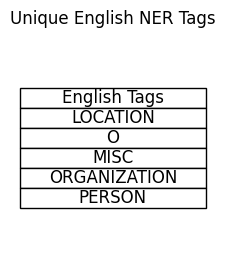

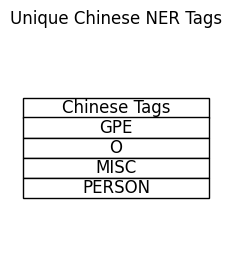

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# 載入 CSV 文件
file_path = 'C:\\Users\\USER\\Downloads\\NLP-Courses\\NLP243\\Projects\\Test_iwslt2017_ner_tagged_test_sample.csv'
ner_df = pd.read_csv(file_path)

# 提取 English NER 和 Chinese NER 標記欄位中的標記
english_tags = ner_df['English NER Tagged'].apply(lambda x: eval(x))
chinese_tags = ner_df['Chinese NER Tagged'].apply(lambda x: eval(x))

# 取得 English NER 中的獨特標記
unique_english_tags = set(tag for sentence in english_tags for _, tag in sentence)

# 取得 Chinese NER 中的獨特標記
unique_chinese_tags = set(tag for sentence in chinese_tags for _, tag in sentence)

# 將獨特標記轉換為 DataFrame
english_tags_df = pd.DataFrame(list(unique_english_tags), columns=['English Tags'])
chinese_tags_df = pd.DataFrame(list(unique_chinese_tags), columns=['Chinese Tags'])

# 顯示 English NER Tags 表格
plt.figure(figsize=(2, 3))
plt.axis('off')
table_english = plt.table(cellText=english_tags_df.values, colLabels=english_tags_df.columns, cellLoc='center', loc='center')
table_english.auto_set_font_size(False)
table_english.set_fontsize(12)
table_english.scale(1.2, 1.2)
plt.title("Unique English NER Tags")
plt.show()

# 顯示 Chinese NER Tags 表格
plt.figure(figsize=(2, 3))
plt.axis('off')
table_chinese = plt.table(cellText=chinese_tags_df.values, colLabels=chinese_tags_df.columns, cellLoc='center', loc='center')
table_chinese.auto_set_font_size(False)
table_chinese.set_fontsize(12)
table_chinese.scale(1.2, 1.2)
plt.title("Unique Chinese NER Tags")
plt.show()


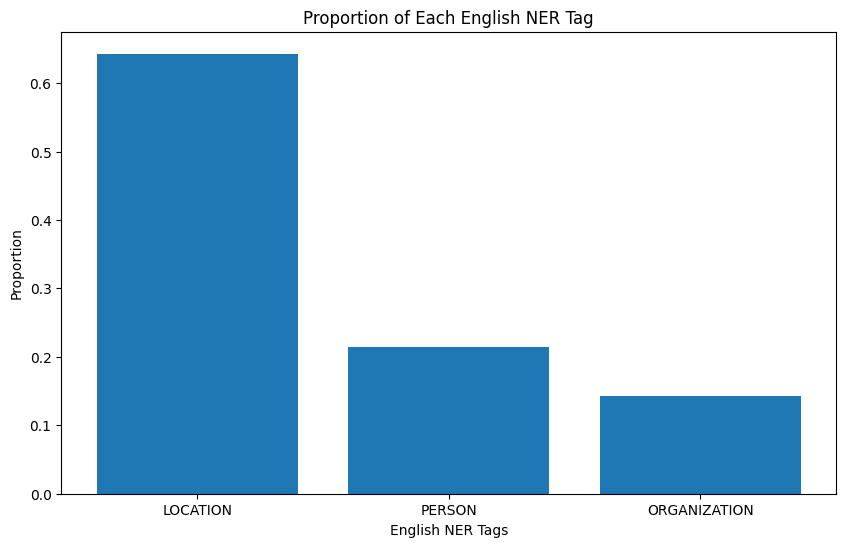

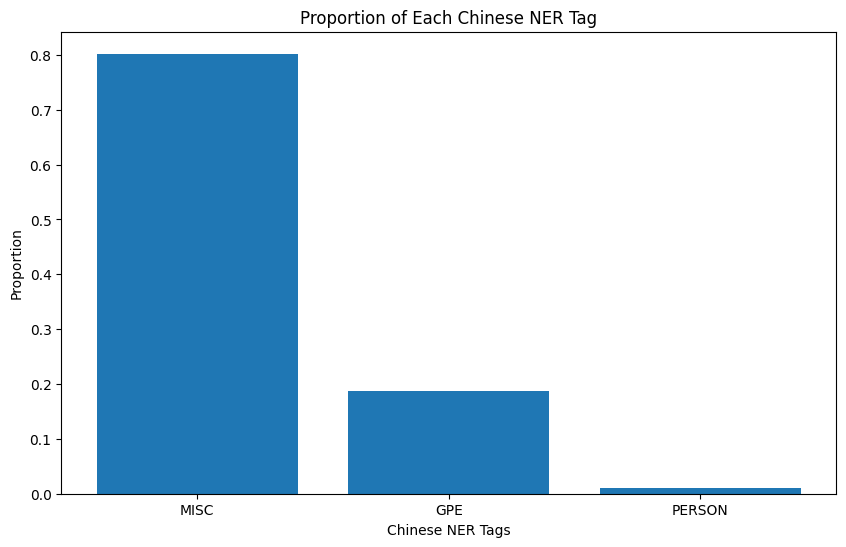

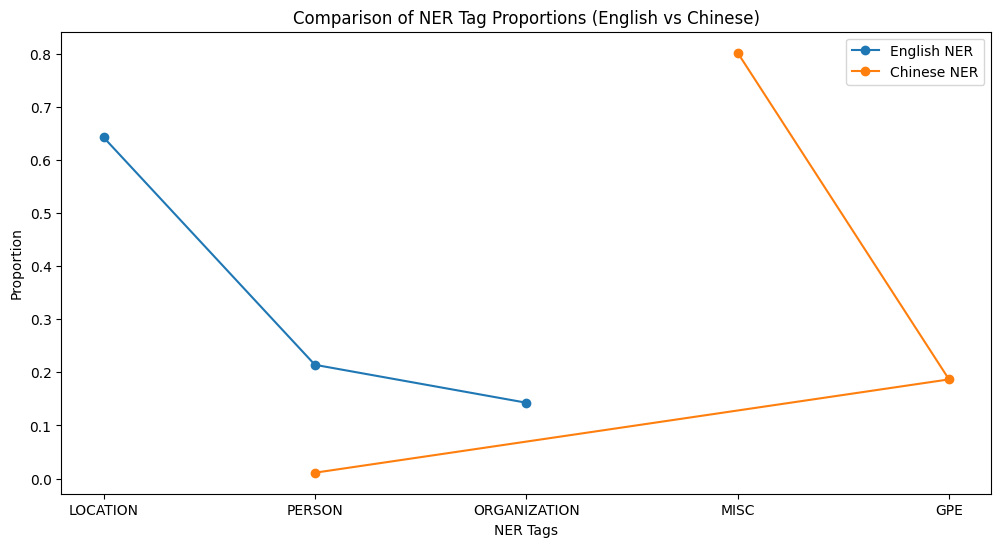

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
file_path = 'C:\\Users\\USER\\Downloads\\NLP-Courses\\NLP243\\Projects\\Test_iwslt2017_ner_tagged_test_sample.csv'
ner_df = pd.read_csv(file_path)

# Extract English and Chinese NER tags and flatten the lists
english_tags = ner_df['English NER Tagged'].apply(lambda x: eval(x))
chinese_tags = ner_df['Chinese NER Tagged'].apply(lambda x: eval(x))

# Count occurrences of each tag for English
english_tag_counts = {}
for sentence in english_tags:
    for _, tag in sentence:
        if tag != 'O':  # Exclude non-entity tags
            english_tag_counts[tag] = english_tag_counts.get(tag, 0) + 1

# Count occurrences of each tag for Chinese
chinese_tag_counts = {}
for sentence in chinese_tags:
    for _, tag in sentence:
        if tag != 'O':  # Exclude non-entity tags
            chinese_tag_counts[tag] = chinese_tag_counts.get(tag, 0) + 1

# Convert counts to proportions
total_english_tags = sum(english_tag_counts.values())
total_chinese_tags = sum(chinese_tag_counts.values())
english_tag_proportions = {tag: count / total_english_tags for tag, count in english_tag_counts.items()}
chinese_tag_proportions = {tag: count / total_chinese_tags for tag, count in chinese_tag_counts.items()}

# Plotting English NER Tag Proportions as a Histogram
plt.figure(figsize=(10, 6))
plt.bar(english_tag_proportions.keys(), english_tag_proportions.values())
plt.xlabel('English NER Tags')
plt.ylabel('Proportion Percentage')
plt.title('Proportion of Each English NER Tag')
plt.show()

# Plotting Chinese NER Tag Proportions as a Histogram
plt.figure(figsize=(10, 6))
plt.bar(chinese_tag_proportions.keys(), chinese_tag_proportions.values())
plt.xlabel('Chinese NER Tags')
plt.ylabel('Proportion Percentage')
plt.title('Proportion of Each Chinese NER Tag')
plt.show()


In [38]:
import pandas as pd

# Sample data with both entries
data = {
    'English Sentence': [
        "In Russia, all war monuments have this beautiful inscription at the top.",
        "So, for example, I was giving this talk recently in New York City, and I said, \"You know when you're on the subway and the other person across the subway car smiles at you, and you just instinctively smile back?\""
    ],
    'English Tags': [
        [('In', 'O'), ('Russia', 'LOCATION'), (',', 'O'), ('all', 'O'), ('war', 'O'), ('monuments', 'O'), ('have', 'O'), ('this', 'O'), ('beautiful', 'O'), ('inscription', 'O'), ('at', 'O'), ('the', 'O'), ('top', 'O'), ('.', 'O')],
        [('So', 'O'), (',', 'O'), ('for', 'O'), ('example', 'O'), (',', 'O'), ('I', 'O'), ('was', 'O'), ('giving', 'O'), ('this', 'O'), ('talk', 'O'), ('recently', 'O'), ('in', 'O'), ('New', 'LOCATION'), ('York', 'LOCATION'), ('City', 'LOCATION'), (',', 'O'), ('and', 'O'), ('I', 'O'), ('said', 'O'), (',', 'O'), ('``', 'O'), ('You', 'O'), ('know', 'O'), ('when', 'O'), ('you', 'O'), ("'re", 'O'), ('on', 'O'), ('the', 'O'), ('subway', 'O'), ('and', 'O'), ('the', 'O'), ('other', 'O'), ('person', 'O'), ('across', 'O'), ('the', 'O'), ('subway', 'O'), ('car', 'O'), ('smiles', 'O'), ('at', 'O'), ('you', 'O'), (',', 'O'), ('and', 'O'), ('you', 'O'), ('just', 'O'), ('instinctively', 'O'), ('smile', 'O'), ('back', 'O'), ('?', 'O'), ("''", 'O')]
    ],
    'Chinese Sentence': [
        "在俄罗斯，所有的战争纪念碑的顶部",
        "打个比方来说， 我最近在纽约市演讲， 其中说到：“当你在地铁上， 车厢对面的人 向你微笑时， 你会下意识地回报以微笑。”"
    ],
    'Chinese Tags': [
        [('在', 'O'), ('俄', 'GPE'), ('罗', 'GPE'), ('斯', 'GPE'), ('，', 'O'), ('所', 'O'), ('有', 'O'), ('的', 'O'), ('战', 'O'), ('争', 'O'), ('纪', 'O'), ('念', 'O'), ('碑', 'O'), ('的', 'O'), ('顶', 'O'), ('部', 'O')],
        [('打', 'O'), ('个', 'O'), ('比', 'O'), ('方', 'O'), ('来', 'O'), ('说', 'O'), ('，', 'O'), ('我', 'O'), ('最', 'O'), ('近', 'O'), ('在', 'O'), ('纽', 'GPE'), ('约', 'GPE'), ('市', 'GPE'), ('演', 'O'), ('讲', 'O'), ('，', 'O'), ('其', 'O'), ('中', 'O'), ('说', 'O'), ('到', 'O'), ('：', 'O'), ('“', 'O'), ('当', 'O'), ('你', 'O'), ('在', 'O'), ('地', 'O'), ('铁', 'O'), ('上', 'O'), ('，', 'O'), ('车', 'O'), ('厢', 'O'), ('对', 'O'), ('面', 'O'), ('的', 'O'), ('人', 'O'), ('向', 'O'), ('你', 'O'), ('微', 'O'), ('笑', 'O'), ('时', 'O'), ('，', 'O'), ('你', 'O'), ('会', 'O'), ('下', 'O'), ('意', 'O'), ('识', 'O'), ('地', 'O'), ('回', 'O'), ('报', 'O'), ('以', 'O'), ('微', 'O'), ('笑', 'O'), ('。', 'O'), ('”', 'O')]
    ]
}

# Create DataFrame
df = pd.DataFrame(data)
df
# # Set display option to show full content of each column
# pd.set_option('display.max_colwidth', None)

# # Display the full DataFrame
# print(df.to_string(index=False))


,English Sentence,English Tags,Chinese Sentence,Chinese Tags
0,"In Russia, all war monuments have this beautiful inscription at the top.","[(In, O), (Russia, LOCATION), (,, O), (all, O), (war, O), (monuments, O), (have, O), (this, O), (beautiful, O), (inscription, O), (at, O), (the, O), (top, O), (., O)]",在俄罗斯，所有的战争纪念碑的顶部,"[(在, O), (俄, GPE), (罗, GPE), (斯, GPE), (，, O), (所, O), (有, O), (的, O), (战, O), (争, O), (纪, O), (念, O), (碑, O), (的, O), (顶, O), (部, O)]"
1,"So, for example, I was giving this talk recently in New York City, and I said, ""You know when you're on the subway and the other person across the subway car smiles at you, and you just instinctively smile back?""","[(So, O), (,, O), (for, O), (example, O), (,, O), (I, O), (was, O), (giving, O), (this, O), (talk, O), (recently, O), (in, O), (New, LOCATION), (York, LOCATION), (City, LOCATION), (,, O), (and, O), (I, O), (said, O), (,, O), (``, O), (You, O), (know, O), (when, O), (you, O), ('re, O), (on, O), (the, O), (subway, O), (and, O), (the, O), (other, O), (person, O), (across, O), (the, O), (subway, O), (car, O), (smiles, O), (at, O), (you, O), (,, O), (and, O), (you, O), (just, O), (instinctively, O), (smile, O), (back, O), (?, O), ('', O)]",打个比方来说， 我最近在纽约市演讲， 其中说到：“当你在地铁上， 车厢对面的人 向你微笑时， 你会下意识地回报以微笑。”,"[(打, O), (个, O), (比, O), (方, O), (来, O), (说, O), (，, O), (我, O), (最, O), (近, O), (在, O), (纽, GPE), (约, GPE), (市, GPE), (演, O), (讲, O), (，, O), (其, O), (中, O), (说, O), (到, O), (：, O), (“, O), (当, O), (你, O), (在, O), (地, O), (铁, O), (上, O), (，, O), (车, O), (厢, O), (对, O), (面, O), (的, O), (人, O), (向, O), (你, O), (微, O), (笑, O), (时, O), (，, O), (你, O), (会, O), (下, O), (意, O), (识, O), (地, O), (回, O), (报, O), (以, O), (微, O), (笑, O), (。, O), (”, O)]"


In [53]:
import pandas as pd

# Sample data with formatted named entities
data = {
    'English Sentence': [
        "In Russia, all war monuments have this beautiful inscription at the top.",
        "So, for example, I was giving this talk recently in New York City, and I said, \"You know when you're on the subway and the other person across the subway car smiles at you, and you just instinctively smile back?\""
    ],
    'Tagged English Sentence': [
        "In  <\\LOCATION, Russia> , all war monuments have this beautiful inscription at the top .",
        "So , for example , I was giving this talk recently in  <\\LOCATION, New>  <\\LOCATION, York>  <\\LOCATION, City> , and I said , `` You know when you 're on the subway and the other person across the subway car smiles at you , and you just instinctively smile back ? ''"
    ],
    'Chinese Sentence': [
        "在俄罗斯，所有的战争纪念碑的顶部",
        "打个比方来说， 我最近在纽约市演讲， 其中说到：“当你在地铁上， 车厢对面的人 向你微笑时， 你会下意识地回报以微笑。”"
    ],
    'Tagged Chinese Sentence': [
        "在  <\\GPE, 俄>  <\\GPE, 罗>  <\\GPE, 斯> ， 所 有 的 战 争 纪 念 碑 的 顶 部",
        "打 个 比 方 来 说 ， 我 最 近 在  <\\GPE, 纽>  <\\GPE, 约>  <\\GPE, 市>  演 讲 ， 其 中 说 到 ： “ 当 你 在 地 铁 上 ， 车 厢 对 面 的 人 向 你 微 笑 时 ， 你 会 下 意 识 地 回 报 以 微 笑 。 ”"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)
df
# Display the DataFrame
# print(df.to_string(index=False))


,English Sentence,Tagged English Sentence,Chinese Sentence,Tagged Chinese Sentence
0,"In Russia, all war monuments have this beautiful inscription at the top.","In <\LOCATION, Russia> , all war monuments have this beautiful inscription at the top .",在俄罗斯，所有的战争纪念碑的顶部,"在 <\GPE, 俄> <\GPE, 罗> <\GPE, 斯> ， 所 有 的 战 争 纪 念 碑 的 顶 部"
1,"So, for example, I was giving this talk recently in New York City, and I said, ""You know when you're on the subway and the other person across the subway car smiles at you, and you just instinctively smile back?""","So , for example , I was giving this talk recently in <\LOCATION, New> <\LOCATION, York> <\LOCATION, City> , and I said , `` You know when you 're on the subway and the other person across the subway car smiles at you , and you just instinctively smile back ? ''",打个比方来说， 我最近在纽约市演讲， 其中说到：“当你在地铁上， 车厢对面的人 向你微笑时， 你会下意识地回报以微笑。”,"打 个 比 方 来 说 ， 我 最 近 在 <\GPE, 纽> <\GPE, 约> <\GPE, 市> 演 讲 ， 其 中 说 到 ： “ 当 你 在 地 铁 上 ， 车 厢 对 面 的 人 向 你 微 笑 时 ， 你 会 下 意 识 地 回 报 以 微 笑 。 ”"
